<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

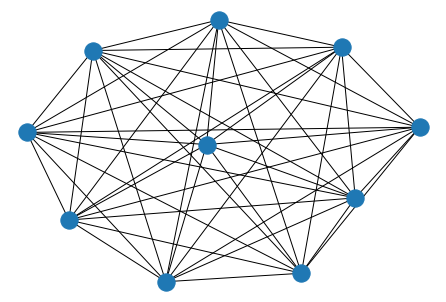

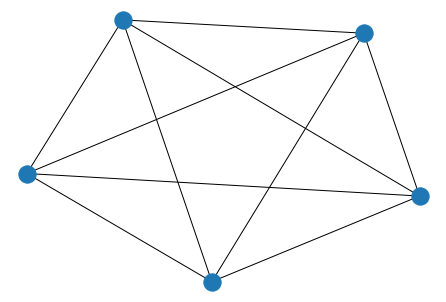

In [1]:
#Erdos-Renyi Graph in Networkx
import random
from networkx import nx
import matplotlib.pyplot as plt

N = 10  # 10 nodes
K = 800  # 1000 agents
#M = 30  # 30 edges
NN = 5


#Graph = nx.gnm_random_graph(N, M)

P = 1 #Probabibilty for Node Connection in random graph
PP = 1
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


# some network properties
#print("the adjacency list")
#for line in nx.generate_adjlist(Graph):
#    print(line)

nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]
[[0 1 1 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
print(Node)
print(len(Node))


{}
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: []}
50


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=random.uniform(0,1)
    Node[i*NN+j].append({'Viral_load' : Viral_load})
print(Node)
print(len(Node))


{0: [{'Viral_load': 0.6059972493415272}], 1: [{'Viral_load': 0.036062774137951004}], 2: [{'Viral_load': 0.9723507293458346}], 3: [{'Viral_load': 0.012921960446098057}], 4: [{'Viral_load': 0.7276313931442087}], 5: [{'Viral_load': 0.6412115475269674}], 6: [{'Viral_load': 0.3455746215989801}], 7: [{'Viral_load': 0.41912827489538584}], 8: [{'Viral_load': 0.9195089674207738}], 9: [{'Viral_load': 0.28205883560601797}], 10: [{'Viral_load': 0.2404206065893767}], 11: [{'Viral_load': 0.2694427589843946}], 12: [{'Viral_load': 0.4542332272672024}], 13: [{'Viral_load': 0.06467681741753706}], 14: [{'Viral_load': 0.5026219344394621}], 15: [{'Viral_load': 0.2072269482615673}], 16: [{'Viral_load': 0.7260830046659028}], 17: [{'Viral_load': 0.33552134334606987}], 18: [{'Viral_load': 0.7244198613914747}], 19: [{'Viral_load': 0.8755189805506405}], 20: [{'Viral_load': 0.6623027957776483}], 21: [{'Viral_load': 0.1276424608300476}], 22: [{'Viral_load': 0.041223620025963026}], 23: [{'Viral_load': 0.95156052118

In [5]:
#Initailizing randomly infection state [0 shows Recovered, 1 shows Susceptible, and 2 shows Infected]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.randint(0,2)
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
  else:
    Rand_nodeN2=Rand_nodeN
  
  Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
  Agent[k].append({'State' : Rand_state})
  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
  else:
    First_nodeN2=First_nodeN

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
  else:
    Second_nodeN2=Second_nodeN
  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
print(Node)
print(Agent)

{0: [{'Viral_load': 0.6059972493415272}, {33: 1}, {34: 0}, {78: 2}, {155: 0}, {241: 0}, {291: 1}, {320: 0}, {432: 0}, {437: 2}, {439: 2}, {463: 0}, {503: 0}, {552: 2}, {623: 1}, {645: 2}, {720: 1}, {762: 1}, {785: 2}], 1: [{'Viral_load': 0.036062774137951004}, {28: 2}, {47: 0}, {144: 0}, {263: 0}, {272: 0}, {319: 2}, {323: 0}, {393: 1}, {407: 0}, {554: 0}, {663: 1}, {690: 2}, {714: 1}], 2: [{'Viral_load': 0.9723507293458346}, {80: 1}, {150: 2}, {179: 1}, {244: 1}, {285: 1}, {370: 2}, {398: 2}, {409: 1}, {595: 1}, {596: 1}, {620: 2}, {642: 2}, {692: 1}], 3: [{'Viral_load': 0.012921960446098057}, {36: 0}, {82: 1}, {152: 2}, {166: 2}, {193: 1}, {216: 0}, {290: 2}, {350: 2}, {361: 1}, {401: 2}, {479: 1}, {542: 0}, {589: 1}, {661: 1}, {699: 0}, {704: 2}, {778: 1}], 4: [{'Viral_load': 0.7276313931442087}, {12: 1}, {25: 0}, {50: 2}, {122: 0}, {143: 1}, {169: 1}, {262: 1}, {271: 2}, {296: 1}, {329: 1}, {354: 2}, {373: 1}, {390: 2}, {424: 0}, {487: 0}, {511: 0}, {575: 1}, {653: 2}, {763: 2}], 5

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

10
5


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append(Node[i*len(GraphN.nodes)+j][0])
    count_nomove=0
    count_move=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(1,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent[a_id][1]['Home_node'])
                  if Agent[a_id][3]['First_node'] in Graph.neighbors(Agent[a_id][7]['Current_node']):
                    neighbors.append(Agent[a_id][3]['First_node'])
                  if Agent[a_id][5]['Second_node'] in Graph.neighbors(Agent[a_id][7]['Current_node']) :
                    neighbors.append(Agent[a_id][5]['Second_node'])
                  #print(neighbors)
                  if len(neighbors) > 0:
                      if len(neighbors) == 3:
                        next = random.choices(neighbors,weights=(1500,750,750), k=1)[0]
                      elif len(neighbors) == 2:
                        next = random.choices(neighbors,weights=(1500,750), k=1)[0]
                      else:
                        next = random.choices(neighbors,weights=(1500), k=1)[0]
                      if next == Agent[a_id][1]['Home_node']:
                        #print("no movement")
                        count_nomove+=1
                      elif next == Agent[a_id][3]['First_node']:
                        Agent[a_id][7]['Current_node'],Agent[a_id][3]['First_node'] = Agent[a_id][3]['First_node'],Agent[a_id][7]['Current_node']
                        Agent[a_id][8]['Current_nodeN'][0],Agent[a_id][4]['First_nodeN'][0] = Agent[a_id][4]['First_nodeN'][0],Agent[a_id][8]['Current_nodeN'][0]
                        Agent[a_id][8]['Current_nodeN'][1],Agent[a_id][4]['First_nodeN'][1] = Agent[a_id][4]['First_nodeN'][1],Agent[a_id][8]['Current_nodeN'][1]
                        Agent[a_id][8]['Current_nodeN'][2],Agent[a_id][4]['First_nodeN'][2] = Agent[a_id][4]['First_nodeN'][2],Agent[a_id][8]['Current_nodeN'][2]
                        count_move+=1
                      else:
                        Agent[a_id][7]['Current_node'],Agent[a_id][5]['Second_node'] = Agent[a_id][5]['Second_node'],Agent[a_id][7]['Current_node']
                        Agent[a_id][8]['Current_nodeN'][0],Agent[a_id][6]['Second_nodeN'][0] = Agent[a_id][6]['Second_nodeN'][0],Agent[a_id][8]['Current_nodeN'][0]
                        Agent[a_id][8]['Current_nodeN'][1],Agent[a_id][6]['Second_nodeN'][1] = Agent[a_id][6]['Second_nodeN'][1],Agent[a_id][8]['Current_nodeN'][1]
                        Agent[a_id][8]['Current_nodeN'][2],Agent[a_id][6]['Second_nodeN'][2] = Agent[a_id][6]['Second_nodeN'][2],Agent[a_id][8]['Current_nodeN'][2]
                        count_move+=1
                        
                      nextn = random.choice(Agent[a_id][8]['Current_nodeN'])
                      if nextn == Agent[a_id][8]['Current_nodeN'][1]:
                        Agent[a_id][8]['Current_nodeN'][1],Agent[a_id][8]['Current_nodeN'][0] = Agent[a_id][8]['Current_nodeN'][0],Agent[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent[a_id][8]['Current_nodeN'][2] :
                        Agent[a_id][8]['Current_nodeN'][2],Agent[a_id][8]['Current_nodeN'][0] = Agent[a_id][8]['Current_nodeN'][0],Agent[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent[a_id][8]['Current_nodeN'][0]=Agent[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(Node[cur][agent])
          curr_walk.append(nex)
          #print(Agent[a_id])
          #print(curr_walk)
          walks.append(nex)
    print("count_no_movements",count_nomove)
    print("count_movements",count_move)
    return Node,Node_next

In [8]:
Node_n=Node.copy() 
for i in range(10):
  Node_p,Node_n = random_walk(Graph,GraphN,Node_n,1,1) 
  count=0
  for i in range(len(Node_p)):
    count+=len(Node_p[i]) - 1
  print(count)
  print(Node_p)
  print(Node_n)


count_no_movements 390
count_movements 410
800
{0: [{'Viral_load': 0.6059972493415272}, {33: 1}, {34: 0}, {78: 2}, {155: 0}, {241: 0}, {291: 1}, {320: 0}, {432: 0}, {437: 2}, {439: 2}, {463: 0}, {503: 0}, {552: 2}, {623: 1}, {645: 2}, {720: 1}, {762: 1}, {785: 2}], 1: [{'Viral_load': 0.036062774137951004}, {28: 2}, {47: 0}, {144: 0}, {263: 0}, {272: 0}, {319: 2}, {323: 0}, {393: 1}, {407: 0}, {554: 0}, {663: 1}, {690: 2}, {714: 1}], 2: [{'Viral_load': 0.9723507293458346}, {80: 1}, {150: 2}, {179: 1}, {244: 1}, {285: 1}, {370: 2}, {398: 2}, {409: 1}, {595: 1}, {596: 1}, {620: 2}, {642: 2}, {692: 1}], 3: [{'Viral_load': 0.012921960446098057}, {36: 0}, {82: 1}, {152: 2}, {166: 2}, {193: 1}, {216: 0}, {290: 2}, {350: 2}, {361: 1}, {401: 2}, {479: 1}, {542: 0}, {589: 1}, {661: 1}, {699: 0}, {704: 2}, {778: 1}], 4: [{'Viral_load': 0.7276313931442087}, {12: 1}, {25: 0}, {50: 2}, {122: 0}, {143: 1}, {169: 1}, {262: 1}, {271: 2}, {296: 1}, {329: 1}, {354: 2}, {373: 1}, {390: 2}, {424: 0}, {487: